# googlenet 만들기

## 1. googlenet 특징
1. 만든사람 : lenet만든사람, but 컴퓨터가 알맞은 net찾게 한거라서 실질적으로 net 구조를 만든거는 computer

2. inception block (9개) - 여러 conv적용(병렬)

    이때, 1x1 conv를 각각 적용하는데, flatten과 비슷한 역할을 함. image의 크기를 조정하기 보다는 channel수를 조정하는 역할을 함(channel(depth)를 깊게 만든다던지..)
    
    * inception block
    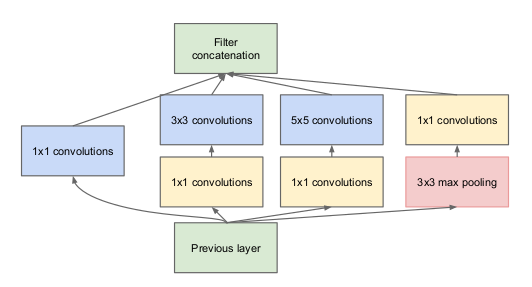
    
    * 1x1 convolution의 역할
    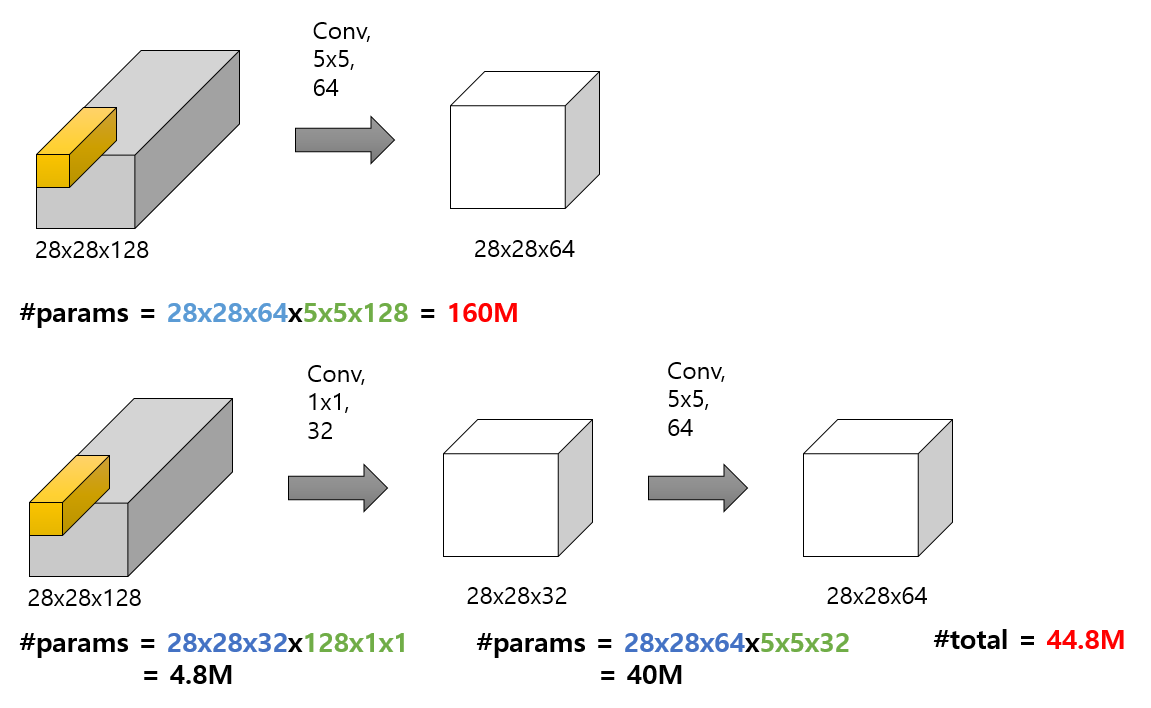
    1x1없는거랑 있는거 비교
    
3. googlenet 구조
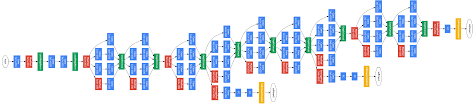

    굉장히 깊은 구조 시도 : 
        gradient vanishing해결 방법? 
        -> output을 중간중간 내면서(3번) gradient vanishing되지 않게 함

## 2. googlenet table
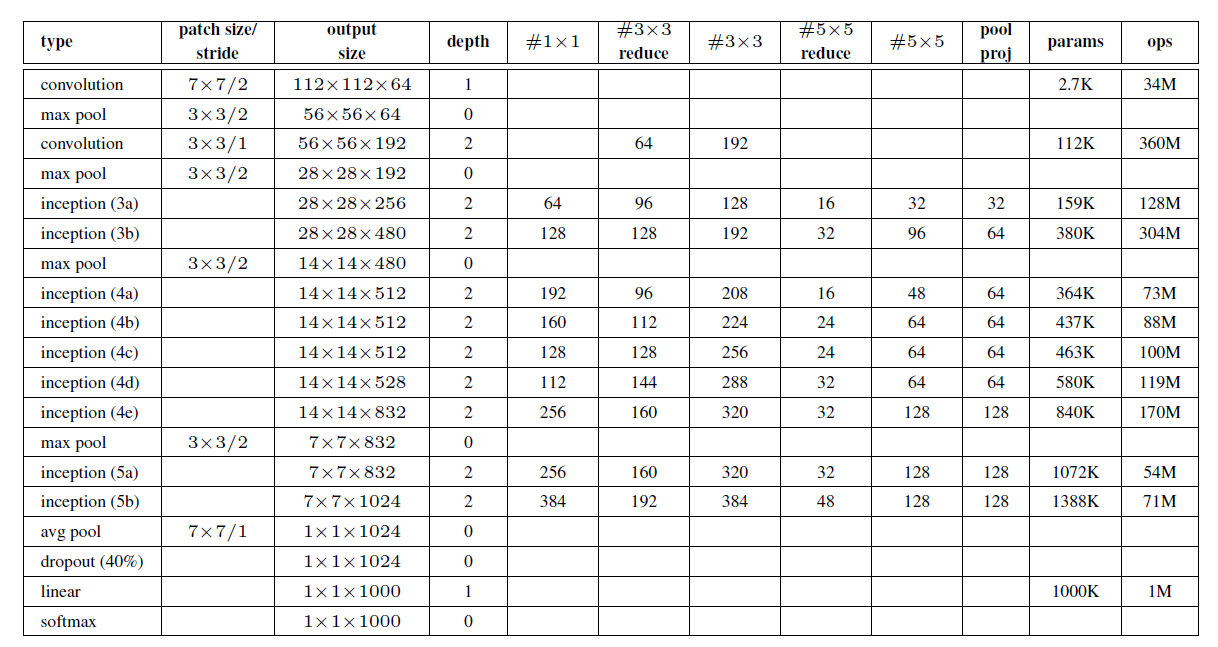

In [1]:
import warnings
from collections import namedtuple
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from typing import Optional, Tuple, List, Callable, Any

In [2]:
class InceptionBlock(nn.Module):
    def __init__(self,input_channel,c1,c2_mid,c2,c3_mid,c3,c4):
        super(InceptionBlock,self).__init__()
        
        self.c1 = nn.Conv2d(input_channel,c1,kernel_size=1)
        
        self.c2_1 = nn.Conv2d(c1,c2_mid,kernel_size=1)
        self.c2_2 = nn.Conv2d(c2_mid,c2,kernel_size=3,padding=1)
        
        self.c3_1 = nn.Conv2d(c2,c3_mid,kernel_size=1)
        self.c3_2 = nn.Conv2d(c3_mid,c3,kernel_size=5,padding=2)
        
        self.c4_1 = nn.MaxPool2d(kernel_size=3,stride=1,padding=1)
        self.c4_2 = nn.Conv2d(input_channel,c4,kernel_size=1)
        
    def forward(self,x):
        
        c1_out = self.c1(x)
        c2_out = self.c2_2(self.c2_1(x))
        c3_out = self.c3_2(self.c3_1(x))
        c4_out = self.c4_2(self.c4_1(x))
        
        return torch.cat([c1_out,c2_out,c3_out,c4_out],dim=1)

## inception version

v1 -> v2 : 5x5 == 3x3 + 3x3(성능 비슷, 연산량 및 파라미터 수 감소가능)
